#Preq

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


#imports

In [3]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn
from sklearn.metrics import accuracy_score
from statistics import mean
import pandas as pd
from matplotlib.dates import date2num


#Collecting Data from 2 companies one from Finance and IT

Collecting TCS : IT

Collecting SBI : Finance

In [4]:
start_date_of_fetch = datetime(2011, 10, 1)
end_date_of_fetch = datetime(2021, 10, 1)
  

Fetching Historical Data from SBI from 1st Oct , 2011 to 1st Oct 2021

In [5]:
sbi_data = yf.download('SBIN.NS', start = start_date_of_fetch, end = end_date_of_fetch)

sbi_data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-03,188.214996,188.500000,185.100006,186.160004,169.136551,20078410
2011-10-04,185.000000,187.279999,175.000000,178.720001,162.376892,50595240
2011-10-05,180.009995,181.220001,171.000000,171.839996,156.126053,62754520
2011-10-07,176.300003,177.785004,174.255005,175.229996,159.206039,29985040
2011-10-10,175.994995,176.485001,172.220001,175.604996,159.546738,32689920
...,...,...,...,...,...,...
2021-09-24,451.100006,451.899994,440.000000,440.750000,440.750000,10731274
2021-09-27,444.899994,450.549988,442.250000,446.600006,446.600006,11746892
2021-09-28,449.200012,455.799988,439.600006,444.899994,444.899994,19241170


Fetching Historical Data from TCS from 1st Oct , 2011 to 1st Oct 2021

In [6]:
tcs_data = yf.download('TCS.NS', start = start_date_of_fetch, end = end_date_of_fetch)

tcs_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-03,510.000000,524.950012,507.649994,521.650024,429.106598,3949264
2011-10-04,519.200012,529.500000,514.549988,522.974976,430.196442,4718224
2011-10-05,527.250000,531.500000,520.500000,521.775024,429.209442,3415262
2011-10-07,537.549988,538.900024,518.750000,524.275024,431.265900,5085808
2011-10-10,524.000000,537.000000,524.000000,532.349976,437.908356,3854814
...,...,...,...,...,...,...
2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,3863.886230,2320754
2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,3829.601807,1673362
2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,3771.912354,2253075


#DATASET EXPLORATION

Data Type obtained from API

In [7]:
print(" The Type of Data for SBI is : {} \n The type of Data for TCS is : {}".format(type(sbi_data),type(tcs_data)))

 The Type of Data for SBI is : <class 'pandas.core.frame.DataFrame'> 
 The type of Data for TCS is : <class 'pandas.core.frame.DataFrame'>


#Variable Identification

Info of SBI Data

In [8]:
sbi_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2461 entries, 2011-10-03 to 2021-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2461 non-null   float64
 1   High       2461 non-null   float64
 2   Low        2461 non-null   float64
 3   Close      2461 non-null   float64
 4   Adj Close  2461 non-null   float64
 5   Volume     2461 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.6 KB


Info Of TCS Data

In [9]:
tcs_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2461 entries, 2011-10-03 to 2021-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2461 non-null   float64
 1   High       2461 non-null   float64
 2   Low        2461 non-null   float64
 3   Close      2461 non-null   float64
 4   Adj Close  2461 non-null   float64
 5   Volume     2461 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.6 KB


Identifying Categorical or continuous attributes

In [10]:
def is_categorical_or_continuous(data):
  dict_for_column_type = {}

  for feature in data.columns :
    
    no_of_unq_values_in_column = data[feature].nunique()
    no_of_total_vaues_in_column = data[feature].count()

    ratio_of_unq_val_to_total_val = no_of_unq_values_in_column/no_of_total_vaues_in_column

    #now clearly if the ratio is low(lesser of unique values) , the column is categorical and if it is more then the column in continuous

    if(ratio_of_unq_val_to_total_val < 0.005):
      dict_for_column_type[feature] = "Categorical"
    
    else:
      dict_for_column_type[feature] = "Continuous"

  return dict_for_column_type


In [11]:
print("The Categorical or continous columns of SBI are ")
is_categorical_or_continuous(sbi_data)

The Categorical or continous columns of SBI are 


{'Adj Close': 'Continuous',
 'Close': 'Continuous',
 'High': 'Continuous',
 'Low': 'Continuous',
 'Open': 'Continuous',
 'Volume': 'Continuous'}

In [12]:
print("The Categorical or continous columns of TCS are ")
is_categorical_or_continuous(tcs_data)

The Categorical or continous columns of TCS are 


{'Adj Close': 'Continuous',
 'Close': 'Continuous',
 'High': 'Continuous',
 'Low': 'Continuous',
 'Open': 'Continuous',
 'Volume': 'Continuous'}

Numeric and non numeric features

In [13]:
def is_numeric_non_numeric(data):
  list_of_column_names = set(data.columns.tolist())
  numeric_cols = set(data.select_dtypes(include=np.number).columns.tolist())
  non_numeric_cols = list_of_column_names - numeric_cols

  return numeric_cols,non_numeric_cols

In [14]:
numeric_cols_sbi,non_numner_cols_sbi = is_numeric_non_numeric(sbi_data)
print("The numeric cols of SBI data is {} and the non numeric cols of sbi data is {}".format(numeric_cols_sbi,non_numner_cols_sbi))

The numeric cols of SBI data is {'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'} and the non numeric cols of sbi data is set()


In [15]:
numeric_cols_tcs,non_numner_cols_tcs = is_numeric_non_numeric(tcs_data)
print("The numeric cols of TCS data is {} and the non numeric cols of TCS data is {}".format(numeric_cols_tcs,non_numner_cols_tcs))

The numeric cols of TCS data is {'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'} and the non numeric cols of TCS data is set()


Number of Unique Values in each column SBI

In [16]:
#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume

dict_of_count_of_unq = {}

for feature in sbi_data.columns.values:
  dict_of_count_of_unq[feature] = sbi_data[feature].nunique()

print("The dict of SBI count of unique values with total number of rows {}".format(len(sbi_data)))
dict_of_count_of_unq

The dict of SBI count of unique values with total number of rows 2461


{'Adj Close': 2273,
 'Close': 2098,
 'High': 1903,
 'Low': 1956,
 'Open': 1715,
 'Volume': 2460}

Number of Unique Values in each column TCS

In [17]:
#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume

dict_of_count_of_unq = {}

for feature in sbi_data.columns.values:
  dict_of_count_of_unq[feature] = tcs_data[feature].nunique()

print("The dict of TCS count of unique values with total number of rows {}".format(len(tcs_data)))
dict_of_count_of_unq

The dict of TCS count of unique values with total number of rows 2461


{'Adj Close': 2444,
 'Close': 2375,
 'High': 2177,
 'Low': 2214,
 'Open': 1932,
 'Volume': 2457}

Number of null Values

In [18]:
print("Null values in sbi data {} , Null values in TCS data {}".format(sbi_data.isnull().values.any(),tcs_data.isnull().values.any()))

Null values in sbi data False , Null values in TCS data False


#Check the trend of Closing Prices

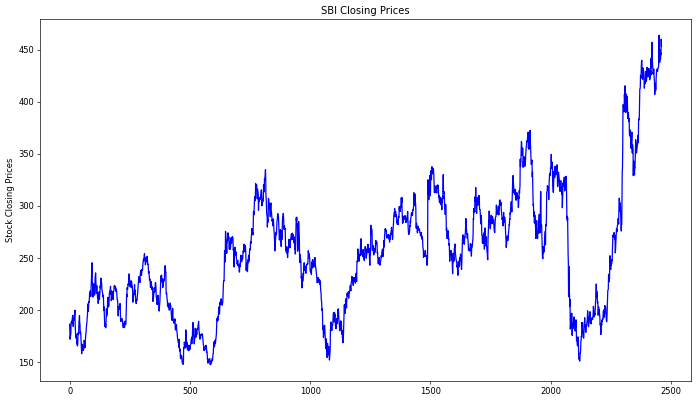

In [19]:
#plot sbi closing prices with Repsect to date.
figure(figsize=(14,8), dpi=60)

plt.ylabel('Stock Closing Prices')

plt.plot(sbi_data['Close'].tolist(), color='Blue',label = 'Closing Prices')

plt.title("SBI Closing Prices")
plt.show()


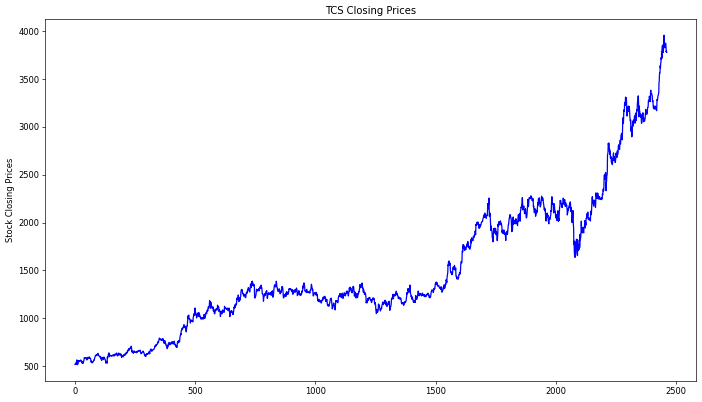

In [20]:
#plot tcs closing prices with Repsect to date.
figure(figsize=(14,8), dpi=60)

plt.ylabel('Stock Closing Prices')

plt.plot(tcs_data['Close'].tolist(), color = "Blue",label = 'Closing Prices')

plt.title("TCS Closing Prices")
plt.show()


**MAke this better**
TCS Data has a steeper trend , i.e its mean increases steeply over time. Also the seasonality in TCS data occurs for shorter durations of time 

#Check The Month Wise Trend of the Stock closing Date

#Plot the mean and Varaince of the data

Making 100 groups from the data . Finding mean and variance from each of the 100 groups and plotting them

In [21]:
def plot_mean_and_variance(dataset:pd.DataFrame , attribute:str):
  #func to plot mean and variance of an attr given the dataframe and the attribute

  #Find mean and variance in groups of 100
  dict_of_means = {}
  dict_of_variance = {}

  list_of_df = np.array_split(dataset, 100)

  for df in list_of_df:
    mean = df[attribute].mean()
    var = df[attribute].var()
    
    dict_of_means[df.index[0]] = mean
    dict_of_variance[df.index[0]] = var  

  #plotting 
  
  figure(figsize=(14,8), dpi=60)
  
  plt.xlabel('Date')
  plt.ylabel('Value')

  plt.plot(list(dict_of_means.keys()), list(dict_of_means.values()),color = "Blue" ,label = 'Mean')
  plt.plot(list(dict_of_variance.keys()), list(dict_of_variance.values()),color="Green" ,label = 'Variance')

  plt.legend(['Mean','Variance'])

  plt.title("Mean an variance")
  plt.show()




SBI Data

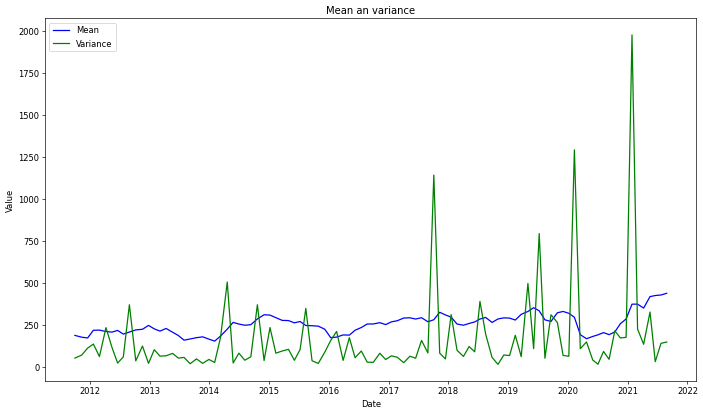

In [22]:
plot_mean_and_variance(dataset = sbi_data,attribute='Close')

TCS Data

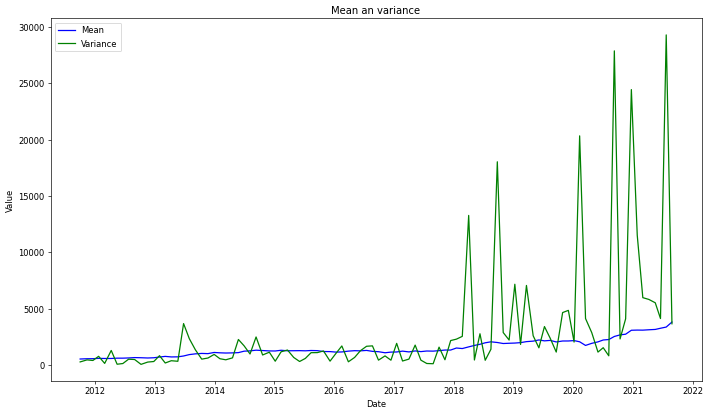

In [23]:
plot_mean_and_variance(dataset = tcs_data,attribute='Close')


since the the mean and varaince varries with time we can **suspect non statioanry time series data** 

#Correlation Matrix
Showing the relationship of other attributes with the closing prices of stock

Note : Below with ACF and PACF plots we discover the relationship of the closing prices with the time


Darker Red strong +ve correlation

Darker blue strong -ve correlation

Sbi data

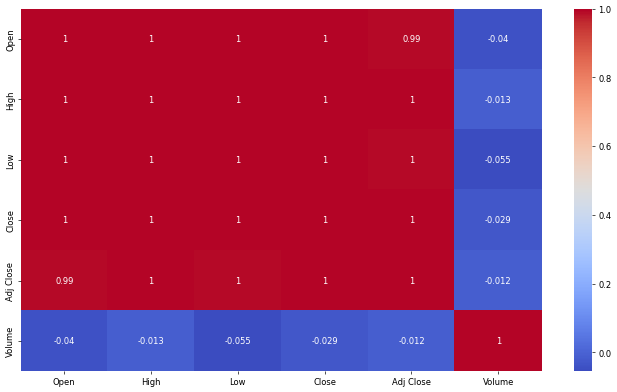

In [24]:
figure(figsize=(14,8), dpi=60)

seaborn.heatmap(sbi_data.corr(),annot=True,cmap="coolwarm")

TCS Data

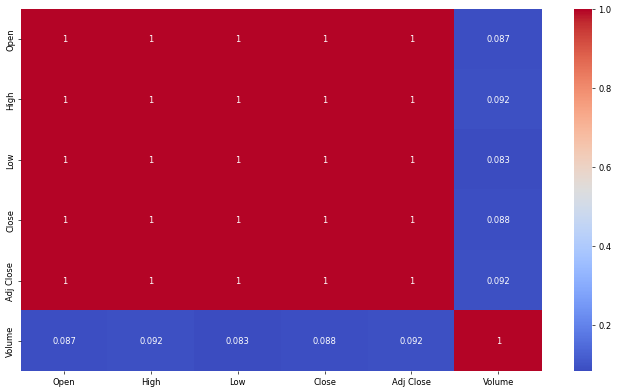

In [25]:
figure(figsize=(14,8), dpi=60)

seaborn.heatmap(tcs_data.corr(),annot=True,cmap="coolwarm")

'Close'  has strong +ve correlation with 'Open','High','Low','Adj Close' and strong -ve correlation with 'Volume'

#What is time Series?
Ans : Time Series Data assumes that the observation at a certain point depends on the prev observations in time.

Ans : S(t) = time series starting at time = t 
= {value at time t , value at time t-1 , value at time t-2, ...... }

S(t-1) = time series starting at time = t-1 
= {value at time t-1 , value at time t-2 , value at time t-3, ...... }


#What is lag
Ans : 

S(t- c) =  = {value at time t-c-1 , value at time t-c-2 , value at time t-c-3, ...... }

where c is the lag


#Autocorrelation Plot or ACF Plot

Autocorrelation plots keeps the lag values on the horizontal axis and the Autocorrelation Function(ACF) values on the Y axis.

Why AutoCorrelation (ACF) ?

Ans : "Auto" indicates self that is we are trying to find the correlation of the data from the dataset. It is the correlation of the time series data with itslef shifted by some time step.
ACF value can range between -1 to +1 . 

**+ve ACF** indicates positive corelation between the past data and the current data . For ex if the past data increases so does the present data value

**-ve ACF** indicates negative correlation between the past data and the current data. For example if the past data increases the current data falls


**ACF at lag c = (Auto Cov at lag c) /Variance**

**Auto Cov at lag c is basically the Cov of S(t) and S(t-c)**


So Autocorelation plot shows the relationship of the current data with that of the past data



In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Plotting ACF of SBI Closing Data 

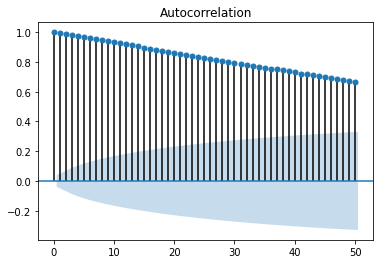

In [27]:
plot_acf(sbi_data['Close'],lags=50)

plt.show()

So as we increase the lag i.e go from t-0 , t-1 , t-2 so on , the ACF value decreses indicating that data further down the timeline affects the current data less significantly.

The conical plot shows the confidence interval indicating that any value above the confidence interval suggests a strong correlation and not statistical error

Also the ACF is +ve at all the lag points meaning there is strong +ve corelation between the past data and the current data.

#ACF plot for TCS Data

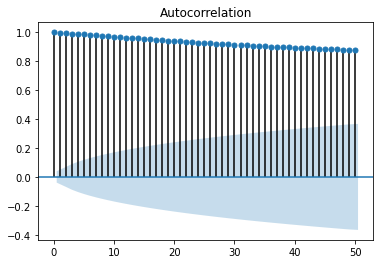

In [28]:
plot_acf(tcs_data['Close'],lags=50)
plt.show()

TCS Data too shows +ve ACF values at all lags indicating +ve Correlation btw past data and the current data.


There is lesser variation of corrleation between the past data and the current data as compared to the SBI Data


#Partial Auto Correlation Function Plot or PACF plot

**Partial Correlation Vs Correlation**

**Correlation**

Correlation (S(t) , S(t-c)) : indicates how data S(t) is affected by data at S(t-c)

However as observed in the above auto correlation plot , S(t-c) is affected by S(t-c-1),S(t-c-2), so on

and so is S(t) affected by all the intermediate data points between t and t-c i.e t-c+1 , t-c+2, so on.

So the corelation will indicated the cummulative effect of S(t) by S(t-c).

**Partial Correlation**

Partial Correlation takes out all the intermediate effect , in other words,

Partial Correlation (S(t) , S(t-c)) : indicates how data S(t) is affected by data at S(t-c) only and not the cummulative effect.

For Example : TODO(Better to plug in eq in gen terms)(Also Write in LAtex)


**Partial Correlation(S(t),S(t-2)) = ( Cov(S(t),S(t-1)|S(t-1))/sq(Variance(S(t)|S(t-1)) * Variance(S(t-2)|S(t-1)) )**

#Plotting PACF of SBI Closing Data

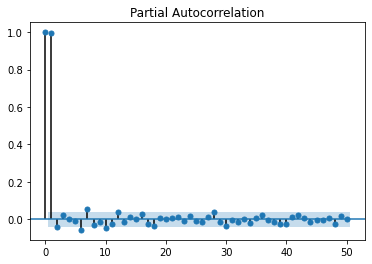

In [29]:
plot_pacf(sbi_data['Close'],lags=50);

Hence it indicates 1st order correlation i.e S(t) is mostly dependent upon S(t-1)

**VERIFY THISS NOT SURE ABOUT THIS RESULT, MAYBE CONSIDER DIFF TIME UNITS?**

#Plotting PACF of TCS Closing Data

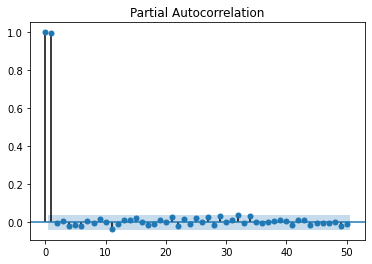

In [30]:
plot_pacf(tcs_data['Close'],lags=50);

Even TCS Data shows 1st order correlation

#Moving Avg Plot

In [31]:
#SBI data imported as sbi_data
#TCS data imported as tcs_data
import pandas as pd
from matplotlib.pyplot import figure

In [32]:
#A generalized subroutine to plot the moving averages and moving variance.
#It can be used to plot any particular column of any processed dataset.
def moving_stats(dataset, variance = False, win=10):

  figure(figsize=(14,8), dpi=60)
  
  #10 for a default window size, can be provided by user
  
  moving_mean = dataset.rolling(window = win).mean().plot(color='red',label='mean')
  moving_std =  dataset.rolling(window = win).std().plot(color='green',label='standard Deviation')
  
  plt.plot(dataset, color='black', label='Raw')
  
  if variance == True:
    #plot variance only if required, exploration can be done through standard deviation too. 
    moving_var = dataset.rolling(window = win).var().plot(color='blue',label='vaiance')
    plt.title('Plot showing moving mean, moving standard deviation and moving variance\n')
  else:
    plt.title('Plot showing moving mean and moving standard deviation\n')
  
  #plt.xlim(startYear, endYear)
  plt.legend(loc='best')
  
  #plt.show()
 


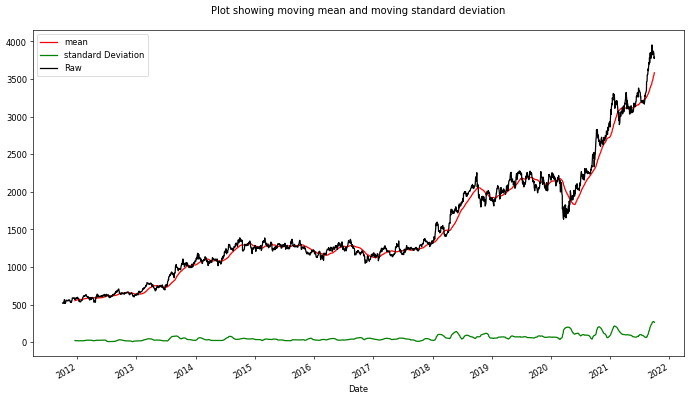

In [33]:
moving_stats(tcs_data['Close'], variance=False, win= 50)
#will work on aesthetic of the plots in a while

The plot of Rolling 'Mean' shows the general trend of the closing stock prices by removing the variations in time steps. Hence we see an upward trend in the closing stock prices of TCS

The std deviation plot shows that the TCs stock is stable and does not have sudden rise or fall in price

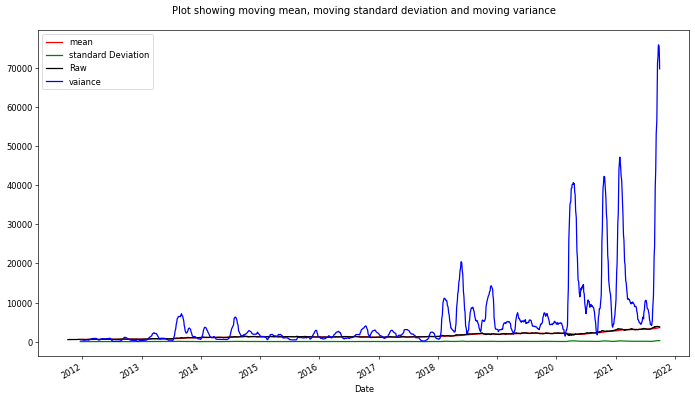

In [34]:
moving_stats(tcs_data['Close'], True, 50)

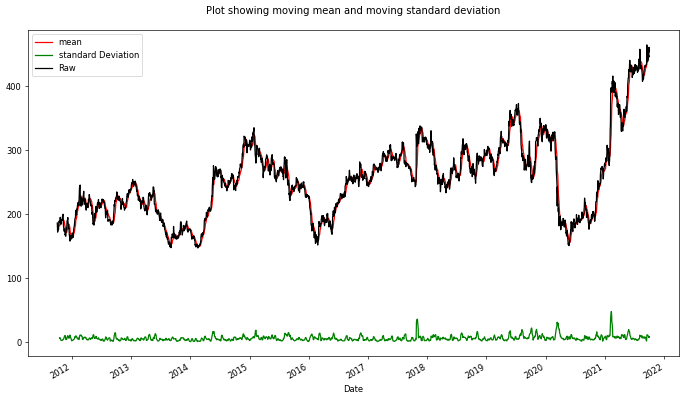

In [35]:
moving_stats(sbi_data['Close'], 60)

The closing price of SBI falls and rises and fails to remain stable over time. Also shown by the spikes in the standard deviation

#STATIONARITY CHECK

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
#Creating a generic function to test whether a series is stationary or not.
#adfuller has already been imported. 

def is_stationary(attribute_values:pd.Series):

  #pass the column itself
  print("Null Hypothesis H0: The series is non-stationary in trends!\n")
  resTuple = adfuller(attribute_values)
  print(resTuple)
  test_stat = resTuple[0]
  p_val = resTuple[1]
  print("Test statistics: ", test_stat)
  print("\nP- value of our series: ",p_val)
  print('\nThe Critical values at 1%, 5% and 10% level of significance are:\n ')
  print(resTuple[4])

  if (p_val < 0.05):
    print("\nWe can REJECT the null hypothesis H0. Our series is stationary!!")

  else:
    print("\nOur series is non-stationary, H0 is accepted.")

In [38]:
is_stationary(tcs_data['Close'])

Null Hypothesis H0: The series is non-stationary in trends!

(1.9610682995582156, 0.9986201768179283, 26, 2434, {'1%': -3.4330394863905473, '5%': -2.8627281866400818, '10%': -2.567402520159153}, 22775.549538241925)
Test statistics:  1.9610682995582156

P- value of our series:  0.9986201768179283

The Critical values at 1%, 5% and 10% level of significance are:
 
{'1%': -3.4330394863905473, '5%': -2.8627281866400818, '10%': -2.567402520159153}

Our series is non-stationary, H0 is accepted.


In [39]:
is_stationary(sbi_data['Close'])

Null Hypothesis H0: The series is non-stationary in trends!

(-1.8437405511589577, 0.3589719665190462, 17, 2443, {'1%': -3.4330295678957983, '5%': -2.8627238067228236, '10%': -2.5674001882176833}, 15367.471256226225)
Test statistics:  -1.8437405511589577

P- value of our series:  0.3589719665190462

The Critical values at 1%, 5% and 10% level of significance are:
 
{'1%': -3.4330295678957983, '5%': -2.8627238067228236, '10%': -2.5674001882176833}

Our series is non-stationary, H0 is accepted.


#Differencing

In [40]:
def difference_transform(series_to_diff,interval = 1) -> pd.Series:

  #As we have observed in PACF graph the prev date influences the current date the most
  #return the differenced attribute 
  
  diff_attr = series_to_diff.diff(periods =interval)
  return diff_attr



In [41]:
def un_difference(series_to_undiff):
  pass

Differenced Closing Price Of SBI

In [42]:
differenced_attr_sbi = difference_transform(sbi_data['Close']).dropna()

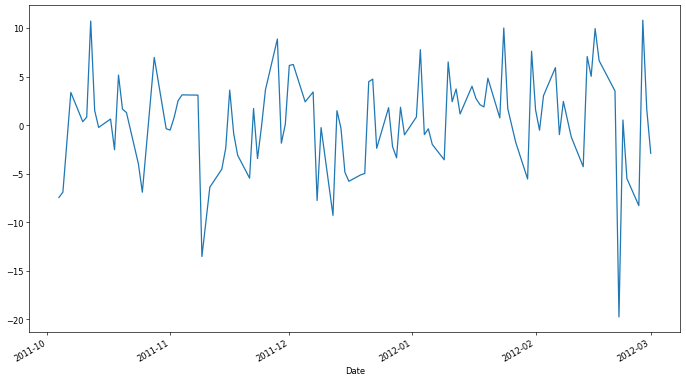

In [43]:
figure(figsize=(14,8), dpi=60)
differenced_attr_sbi[:100].plot() #zooming in to understand the effect differencing better

In [44]:
is_stationary(differenced_attr_sbi[1:])

Null Hypothesis H0: The series is non-stationary in trends!

(-11.032047280751238, 5.636209723480982e-20, 16, 2442, {'1%': -3.4330306663366255, '5%': -2.862724291785039, '10%': -2.56740044647283}, 15358.049484121959)
Test statistics:  -11.032047280751238

P- value of our series:  5.636209723480982e-20

The Critical values at 1%, 5% and 10% level of significance are:
 
{'1%': -3.4330306663366255, '5%': -2.862724291785039, '10%': -2.56740044647283}

We can REJECT the null hypothesis H0. Our series is stationary!!


**Non Stationarity in trends does not exist after differencing**

Differenced Closing Price of TCS

In [45]:
differenced_attr_tcs = difference_transform(tcs_data['Close']).dropna()

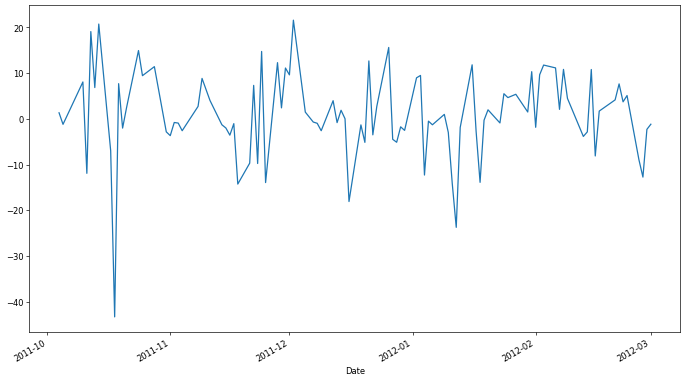

In [46]:
figure(figsize=(14,8), dpi=60)

differenced_attr_tcs[:100].plot() #zooming in to understand the effect differencing better

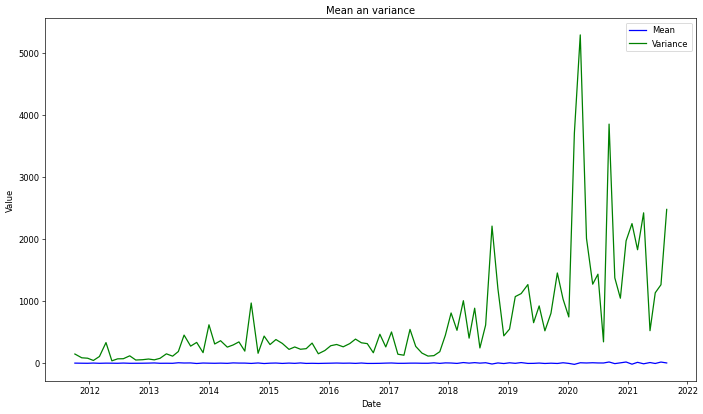

In [47]:
plot_mean_and_variance(pd.DataFrame(differenced_attr_tcs, columns=['Close']),'Close')

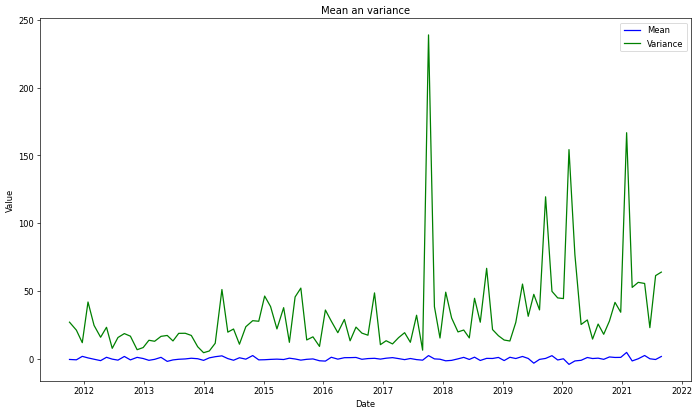

In [48]:
plot_mean_and_variance(pd.DataFrame(differenced_attr_sbi, columns=['Close']),'Close')

In [49]:
is_stationary(differenced_attr_tcs[1:])

Null Hypothesis H0: The series is non-stationary in trends!

(-10.773138476814426, 2.356255435930218e-19, 25, 2433, {'1%': -3.4330405929799293, '5%': -2.862728675299008, '10%': -2.5674027803295183}, 22760.2270831408)
Test statistics:  -10.773138476814426

P- value of our series:  2.356255435930218e-19

The Critical values at 1%, 5% and 10% level of significance are:
 
{'1%': -3.4330405929799293, '5%': -2.862728675299008, '10%': -2.5674027803295183}

We can REJECT the null hypothesis H0. Our series is stationary!!


#Logarithmic Transform
take Log at each data point

In [50]:
def log_transfrom(series_to_log:pd.Series) -> pd.Series:

  log_attr = np.log(series_to_log)
  return log_attr


sbi data

In [51]:
logged_sbi = log_transfrom(sbi_data['Close'])


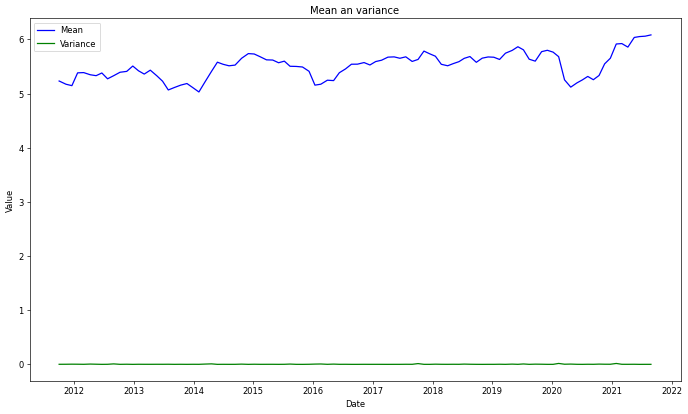

In [52]:

plot_mean_and_variance(pd.DataFrame(logged_sbi, columns=['Close']),'Close')

In [53]:
is_stationary(logged_sbi)

Null Hypothesis H0: The series is non-stationary in trends!

(-2.2780197095100627, 0.17915506898869266, 17, 2443, {'1%': -3.4330295678957983, '5%': -2.8627238067228236, '10%': -2.5674001882176833}, -11625.527765720537)
Test statistics:  -2.2780197095100627

P- value of our series:  0.17915506898869266

The Critical values at 1%, 5% and 10% level of significance are:
 
{'1%': -3.4330295678957983, '5%': -2.8627238067228236, '10%': -2.5674001882176833}

Our series is non-stationary, H0 is accepted.


tcs

In [54]:
logged_tcs = log_transfrom(tcs_data['Close'])


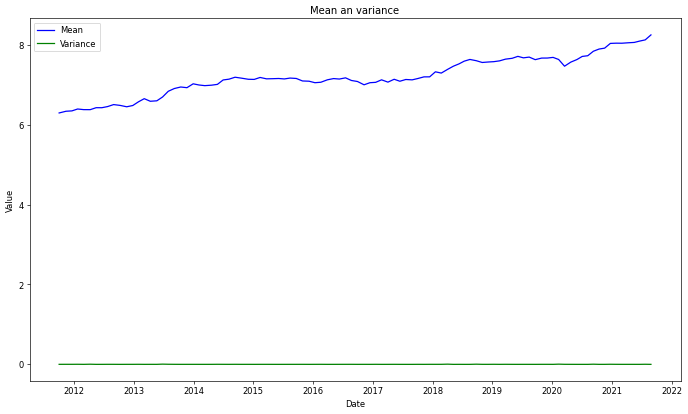

In [55]:
plot_mean_and_variance(pd.DataFrame(logged_tcs, columns=['Close']),'Close')

In [56]:
is_stationary(logged_tcs)

Null Hypothesis H0: The series is non-stationary in trends!

(-0.2924860270433427, 0.9265618143932244, 21, 2439, {'1%': -3.4330339670691994, '5%': -2.8627257493596634, '10%': -2.5674012225098473}, -13290.388479043995)
Test statistics:  -0.2924860270433427

P- value of our series:  0.9265618143932244

The Critical values at 1%, 5% and 10% level of significance are:
 
{'1%': -3.4330339670691994, '5%': -2.8627257493596634, '10%': -2.5674012225098473}

Our series is non-stationary, H0 is accepted.


Models, Fitting, and Prediction.

> **TCS**: The closing price is stationary after the first difference. The *differenced_attr_tcs* has been used for fitting and prediction

TCS(AR(1))

In [57]:
#TCS AR(1)
from statsmodels.tsa.statespace.sarimax import SARIMAX as smx
#differenced_attr_tcs
dtcs = differenced_attr_tcs

In [58]:
#passing 0 for the MA order, as we are only concerned with AR modelling for now
model_tcs_AR = smx(dtcs,order=(1,0,0),trend='c')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [59]:
res_tcs_AR = model_tcs_AR.fit()

In [60]:
print(res_tcs_AR.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 2460
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -11507.874
Date:                Sat, 11 Dec 2021   AIC                          23021.747
Time:                        03:44:10   BIC                          23039.171
Sample:                             0   HQIC                         23028.078
                               - 2460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3585      0.525      2.587      0.010       0.329       2.388
ar.L1         -0.0268      0.013     -2.127      0.033      -0.052      -0.002
sigma2       677.5761      9.307     72.803      0.0

In [61]:

forecast_tcs_AR = res_tcs_AR.get_prediction(start=-200)
forecast_tcs_AR

In [62]:
#mean of the prediction is basically a pandas series
mean_of_forecast_AR = forecast_tcs_AR.predicted_mean
mean_of_forecast_AR

Date
2020-12-10    0.996032
2020-12-11    2.069897
2020-12-14    1.377253
2020-12-15    0.979928
2020-12-16    2.328964
                ...   
2021-09-24    1.167848
2021-09-27    1.303425
2021-09-28    2.280646
2021-09-29    2.910198
2021-09-30    1.016167
Length: 200, dtype: float64

In [63]:
dtcs

Date
2011-10-04     1.324951
2011-10-05    -1.199951
2011-10-07     2.500000
2011-10-10     8.074951
2011-10-11   -11.924988
                ...    
2021-09-24     2.050049
2021-09-27   -34.350098
2021-09-28   -57.800049
2021-09-29    12.750000
2021-09-30   -16.349854
Name: Close, Length: 2460, dtype: float64

In [64]:
#it will return pandas DataFrame
interval_of_confidence_AR = forecast_tcs_AR.conf_int()
interval_of_confidence_AR

,lower Close,upper Close
Date,,
2020-12-10,-50.022403,52.014467
2020-12-11,-48.948538,53.088332
2020-12-14,-49.641182,52.395688
2020-12-15,-50.038507,51.998363
2020-12-16,-48.689471,53.347399
...,...,...
2021-09-24,-49.850587,52.186283
2021-09-27,-49.715010,52.321860
2021-09-28,-48.737789,53.299081


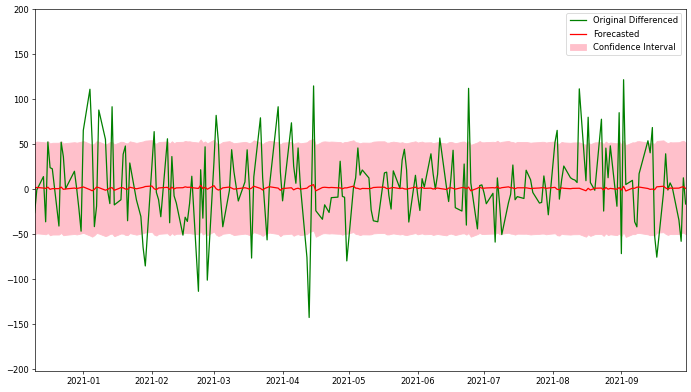

In [65]:
#plotting the predicted values
lower = interval_of_confidence_AR['lower Close']
upper = interval_of_confidence_AR['upper Close']
figure(figsize=(14,8),dpi=60)
plt.plot(dtcs, color='green', label='Original Differenced')
plt.plot(mean_of_forecast_AR.index, mean_of_forecast_AR.values, color='Red', label='Forecasted')
plt.fill_between(mean_of_forecast_AR.index, lower, upper, color='pink', label='Confidence Interval')
plt.xlim(date2num([mean_of_forecast_AR.index.min(),mean_of_forecast_AR.index.max() ]))
plt.legend(loc='best')

In [66]:
residuals = res_tcs_AR.resid
mae = np.mean(np.abs(residuals))
print(mae)

17.114023312876547


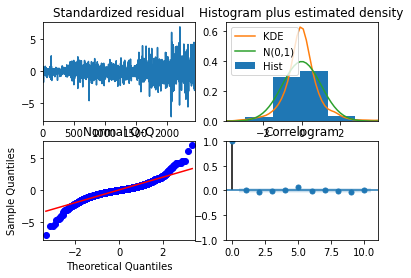

<Figure size 840x480 with 0 Axes>

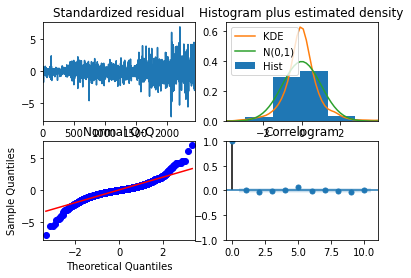

In [67]:
figure(figsize=(14,8),dpi=60)
res_tcs_AR.plot_diagnostics()

In [68]:
dtcs

Date
2011-10-04     1.324951
2011-10-05    -1.199951
2011-10-07     2.500000
2011-10-10     8.074951
2011-10-11   -11.924988
                ...    
2021-09-24     2.050049
2021-09-27   -34.350098
2021-09-28   -57.800049
2021-09-29    12.750000
2021-09-30   -16.349854
Name: Close, Length: 2460, dtype: float64

In [69]:
#for now, will roll back the differenced later

In [89]:
def get_MA_results(series,train_data,test_data,q=1,trend='c'): #get predictions on the test data
  model_MA = smx(series, order=(0,0,q), trend=trend)
  res_MA = model_MA.fit()
  
  start=len(train_data) #starting index of the time series from which to forecast 
  end=len(train_data)+len(test_data)-1 #end index of the time series from which to forecast

  forecast_MA = res_MA.get_prediction(start=start, end=end, dynamic=False, typ='levels')
  
  prediction_series = forecast_MA.predicted_mean
  ci = forecast_MA.conf_int()
  
  return prediction_series,ci






In [91]:

def get_ARMA_results(series,train_data,test_data,p=0,d=0,q=0,trend='c'): #get predictions on the test data
  
  model_ARMA = smx(series, order=(p,d,q), trend=trend)
  res_ARMA = model_ARMA.fit()
  
  start=len(train_data) #starting index of the time series from which to forecast 
  end=len(train_data)+len(test_data)-1 #end index of the time series from which to forecast

  forecast_ARMA = res_ARMA.get_prediction(start=start, end=end, dynamic=False, typ='levels')
  
  prediction_series = forecast_ARMA.predicted_mean
  ci = forecast_ARMA.conf_int()

  
  return prediction_series,ci



SBI 4 MA Plot

In [101]:
import seaborn as sns

sns.set(rc={'figure.figsize':(14, 8)})

In [93]:
sbi_4 = pd.DataFrame(sbi_data.loc['2015-01':'2019-01', 'Close'],columns=['Close'])

In [94]:
sbi_4 = sbi_4.asfreq('b')

In [95]:
sbi_4 = sbi_4.fillna(0)

In [97]:
sbi_4 = difference_transform(sbi_4)

In [98]:
sbi_train_4 = sbi_4.loc['2015-01':'2018-01']

sbi_test_4 = sbi_4.loc['2018-02':'2019-01']


In [99]:
sbi_pred_test,ci= get_MA_results(sbi_4,sbi_train_4,sbi_test_4,q=1,trend='c')

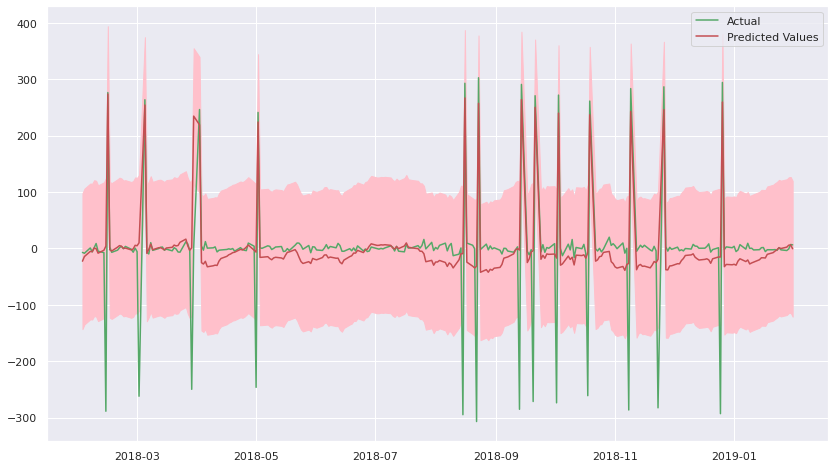

In [102]:
# Plot predictions against known values


title = 'Comparison of predictions of MA of SBI 4 years'

plt.plot(sbi_test_4, label = "Actual",color='g')
plt.plot(sbi_pred_test, label = " Predicted",color='r')
plt.fill_between(ci.index, ci['lower Close'],ci['upper Close'], color='pink', label='Confidence Interval')

plt.legend(['Actual','Predicted Values'])

plt.show()

SBI 4 ARMA Plot

In [106]:
sbi_pred_arma,ci= get_ARMA_results(sbi_4,sbi_train_4,sbi_test_4,p=1,d=0,q=1,trend='c')

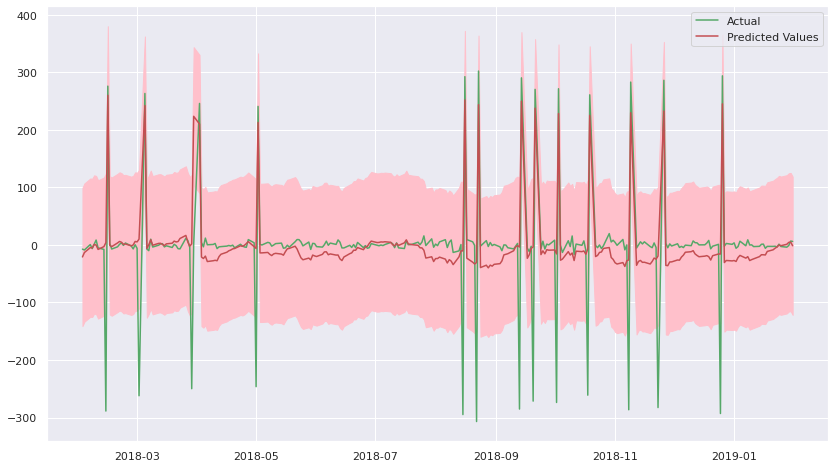

In [107]:
# Plot predictions against known values


title = 'Comparison of predictions of ARMA of SBI 4 years'

plt.plot(sbi_test_4, label = "Actual",color='g')
plt.plot(sbi_pred_arma, label = " Predicted",color='r')
plt.fill_between(ci.index, ci['lower Close'],ci['upper Close'], color='pink', label='Confidence Interval')

plt.legend(['Actual','Predicted Values'])

plt.show()

TCS(MA(1))

In [72]:
#dtcs is our differenced data, SARIMAX has been imported as smx
model_tcs_MA = smx(dtcs, order=(0,0,1), trend='c')
res_tcs_MA = model_tcs_MA.fit()
print(res_tcs_MA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 2460
Model:               SARIMAX(0, 0, 1)   Log Likelihood              -11507.823
Date:                Sat, 11 Dec 2021   AIC                          23021.647
Time:                        03:44:12   BIC                          23039.071
Sample:                             0   HQIC                         23027.978
                               - 2460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3280      0.510      2.604      0.009       0.328       2.328
ma.L1         -0.0284      0.013     -2.249      0.025      -0.053      -0.004
sigma2       677.1287      9.295     72.848      0.0

In [73]:
forecast_tcs_MA = res_tcs_MA.get_prediction(-200)
mean_of_forecast_MA = forecast_tcs_MA.predicted_mean
mean_of_forecast_MA

Date
2020-12-10    0.935187
2020-12-11    2.106909
2020-12-14    1.407657
2020-12-15    0.967605
2020-12-16    2.381811
                ...   
2021-09-24    1.164928
2021-09-27    1.302833
2021-09-28    2.340229
2021-09-29    3.035478
2021-09-30    1.052147
Length: 200, dtype: float64

In [74]:
interval_of_confidence_MA = forecast_tcs_MA.conf_int()
interval_of_confidence_MA

,lower Close,upper Close
Date,,
2020-12-10,-50.066403,51.936776
2020-12-11,-48.894681,53.108498
2020-12-14,-49.593933,52.409246
2020-12-15,-50.033985,51.969194
2020-12-16,-48.619778,53.383401
...,...,...
2021-09-24,-49.836661,52.166518
2021-09-27,-49.698756,52.304423
2021-09-28,-48.661361,53.341818


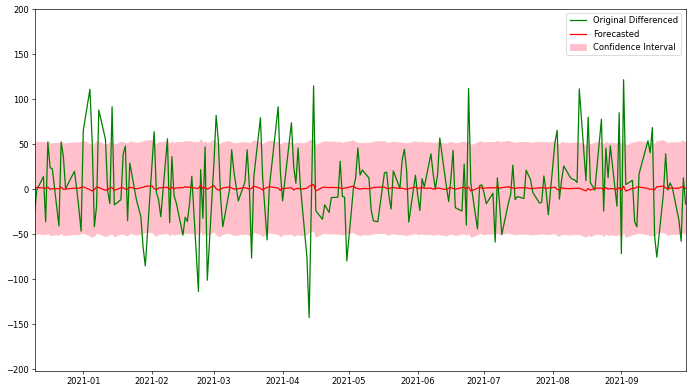

In [75]:
lower = interval_of_confidence_MA['lower Close']
upper = interval_of_confidence_MA['upper Close']
figure(figsize=(14,8),dpi=60)
plt.plot(dtcs, color='green', label='Original Differenced')
plt.plot(mean_of_forecast_MA.index, mean_of_forecast_MA.values, color='Red', label='Forecasted')
plt.fill_between(mean_of_forecast_MA.index, lower, upper, color='pink', label='Confidence Interval')
plt.xlim(date2num([mean_of_forecast_MA.index.min(),mean_of_forecast_MA.index.max() ]))
plt.legend(loc='best')

In [76]:
#will rollback differenced values

TCS(ARMA(1,1))

In [77]:
#dtcs is our differenced data, SARIMAX has been imported as smx
model_tcs_ARMA = smx(dtcs, order=(1,0,1), trend='c')
res_tcs_ARMA = model_tcs_ARMA.fit()
print(res_tcs_ARMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 2460
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -11507.249
Date:                Sat, 11 Dec 2021   AIC                          23022.497
Time:                        03:44:14   BIC                          23045.729
Sample:                             0   HQIC                         23030.939
                               - 2460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8067      0.476      1.694      0.090      -0.127       1.740
ar.L1          0.3891      0.284      1.369      0.171      -0.168       0.946
ma.L1         -0.4214      0.280     -1.503      0.1

In [78]:
forecast_tcs_ARMA = res_tcs_ARMA.get_prediction(-200)
mean_of_forecast_ARMA = forecast_tcs_ARMA.predicted_mean
mean_of_forecast_ARMA

Date
2020-12-10    0.069618
2020-12-11    1.692293
2020-12-14    1.542455
2020-12-15    1.001096
2020-12-16    2.396642
                ...   
2021-09-24    1.041553
2021-09-27    1.179365
2021-09-28    2.413611
2021-09-29    3.691462
2021-09-30    1.950336
Length: 200, dtype: float64

In [79]:
interval_of_confidence_ARMA = forecast_tcs_ARMA.conf_int()
interval_of_confidence_ARMA

,lower Close,upper Close
Date,,
2020-12-10,-50.922993,51.062229
2020-12-11,-49.300317,52.684904
2020-12-14,-49.450155,52.535066
2020-12-15,-49.991515,51.993707
2020-12-16,-48.595969,53.389253
...,...,...
2021-09-24,-49.951057,52.034164
2021-09-27,-49.813246,52.171976
2021-09-28,-48.578999,53.406222


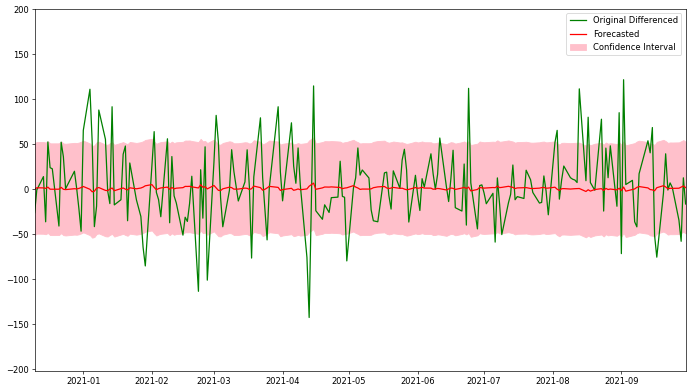

In [80]:
lower = interval_of_confidence_ARMA['lower Close']
upper = interval_of_confidence_ARMA['upper Close']
figure(figsize=(14,8),dpi=60)
plt.plot(dtcs, color='green', label='Original Differenced')
plt.plot(mean_of_forecast_ARMA.index, mean_of_forecast_ARMA.values, color='Red', label='Forecasted')
plt.fill_between(mean_of_forecast_ARMA.index, lower, upper, color='pink', label='Confidence Interval')
plt.xlim(date2num([mean_of_forecast_ARMA.index.min(),mean_of_forecast_ARMA.index.max() ]))
plt.legend(loc='best')

In [81]:
#will rollback differenced values

SBI: The closing price is stationary after the first difference. The differenced_attr has been used for fitting and prediction

###SBI(AR(1))

In [82]:
#SARIMAX has been imported as smx
dsbi = differenced_attr_sbi
model_sbi_AR = smx(dsbi, order=(1,0,0), trend='c')
res_sbi_AR = model_sbi_AR.fit()
print(res_sbi_AR.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 2460
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -7768.842
Date:                Sat, 11 Dec 2021   AIC                          15543.684
Time:                        03:44:15   BIC                          15561.108
Sample:                             0   HQIC                         15550.015
                               - 2460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1054      0.118      0.890      0.374      -0.127       0.337
ar.L1          0.0317      0.014      2.266      0.023       0.004       0.059
sigma2        32.4092      0.363     89.372      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [83]:
forecast_sbi_AR = res_sbi_AR.get_prediction(-200)
mean_of_forecast_AR = forecast_sbi_AR.predicted_mean
mean_of_forecast_AR

Date
2020-12-10    0.056282
2020-12-11    0.080027
2020-12-14    0.197172
2020-12-15    0.160761
2020-12-16   -0.007040
                ...   
2021-09-24    0.452037
2021-09-27   -0.181171
2021-09-28    0.290569
2021-09-29    0.051532
2021-09-30    0.583429
Length: 200, dtype: float64

In [84]:
interval_of_confidence_AR = forecast_sbi_AR.conf_int()
interval_of_confidence_AR

,lower Close,upper Close
Date,,
2020-12-10,-11.101609,11.214174
2020-12-11,-11.077865,11.237918
2020-12-14,-10.960720,11.355063
2020-12-15,-10.997130,11.318653
2020-12-16,-11.164931,11.150852
...,...,...
2021-09-24,-10.705854,11.609928
2021-09-27,-11.339063,10.976720
2021-09-28,-10.867322,11.448461


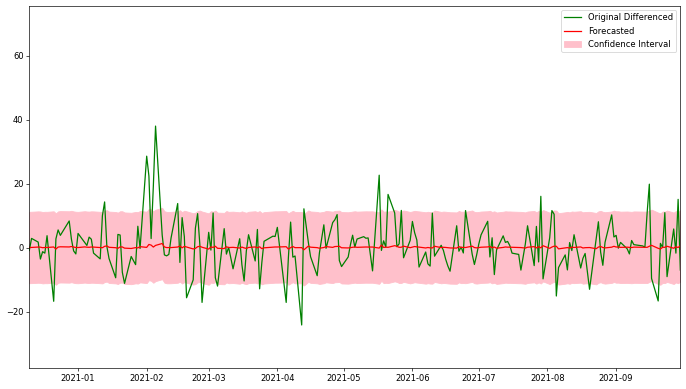

In [85]:
lower = interval_of_confidence_AR['lower Close']
upper = interval_of_confidence_AR['upper Close']
figure(figsize=(14,8),dpi=60)
plt.plot(dsbi, color='green', label='Original Differenced')
plt.plot(mean_of_forecast_AR.index, mean_of_forecast_AR.values, color='Red', label='Forecasted')
plt.fill_between(mean_of_forecast_AR.index, lower, upper, color='pink', label='Confidence Interval')
plt.xlim(date2num([mean_of_forecast_AR.index.min(),mean_of_forecast_AR.index.max() ]))
plt.legend(loc='best')

In [86]:
#will rollback original series later

SBI(MA(1))

In [87]:
sbi_train_4 = dsbi.loc['2015-01':'2018-01']

sbi_test_4 = dsbi.loc['2018-02':'2019-01']

In [88]:
#SARIMAX has been imported as smx
model_sbi_MA = smx(sbi_train_4, order=(0,0,1), trend='c')
res_sbi_MA = model_sbi_MA.fit()
print(res_sbi_MA.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                  762
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2392.664
Date:                Sat, 11 Dec 2021   AIC                           4791.329
Time:                        03:45:28   BIC                           4805.237
Sample:                             0   HQIC                          4796.684
                                - 762                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.234      0.007      0.994      -0.457       0.461
ma.L1          0.0290      0.035      0.822      0.411      -0.040       0.098
sigma2        31.2521      0.496     63.056      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
forecast_sbi_MA = res_sbi_MA.get_prediction(-200)
mean_of_forecast_MA = forecast_sbi_MA.predicted_mean
mean_of_forecast_MA

In [ ]:
interval_of_confidence_MA = forecast_sbi_MA.conf_int()
interval_of_confidence_MA

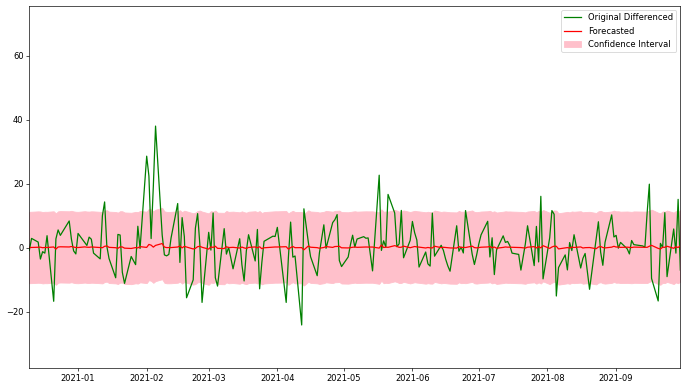

In [ ]:
lower = interval_of_confidence_MA['lower Close']
upper = interval_of_confidence_MA['upper Close']
figure(figsize=(14,8),dpi=60)
plt.plot(dsbi, color='green', label='Original Differenced')
plt.plot(mean_of_forecast_MA.index, mean_of_forecast_MA.values, color='Red', label='Forecasted')
plt.fill_between(mean_of_forecast_MA.index, lower, upper, color='pink', label='Confidence Interval')
plt.xlim(date2num([mean_of_forecast_MA.index.min(),mean_of_forecast_MA.index.max() ]))
plt.legend(loc='best')

SBI(ARMA(1,1))

In [ ]:
#SARIMAX has been imported as smx
model_sbi_ARMA = smx(dsbi, order=(1,0,1), trend='c')
res_sbi_ARMA = model_sbi_ARMA.fit()
print(res_sbi_ARMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 2460
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -7768.822
Date:                Fri, 10 Dec 2021   AIC                          15545.643
Time:                        13:38:17   BIC                          15568.875
Sample:                             0   HQIC                         15554.085
                               - 2460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1148      0.141      0.814      0.416      -0.162       0.391
ar.L1         -0.0602      0.541     -0.111      0.911      -1.120       0.999
ma.L1          0.0921      0.538      0.171      0.8

In [ ]:
forecast_sbi_ARMA = res_sbi_ARMA.get_prediction(-200)
mean_of_forecast_ARMA = forecast_sbi_ARMA.predicted_mean
mean_of_forecast_ARMA

Date
2020-12-10    0.050456
2020-12-11    0.084658
2020-12-14    0.199462
2020-12-15    0.152230
2020-12-16   -0.012380
                ...   
2021-09-24    0.454807
2021-09-27   -0.215570
2021-09-28    0.321145
2021-09-29    0.031045
2021-09-30    0.593319
Length: 200, dtype: float64

In [ ]:
interval_of_confidence_ARMA = forecast_sbi_ARMA.conf_int()
interval_of_confidence_ARMA

,lower Close,upper Close
Date,,
2020-12-10,-11.105635,11.206548
2020-12-11,-11.071434,11.240749
2020-12-14,-10.956630,11.355553
2020-12-15,-11.003861,11.308322
2020-12-16,-11.168471,11.143712
...,...,...
2021-09-24,-10.701284,11.610898
2021-09-27,-11.371662,10.940521
2021-09-28,-10.834946,11.477237


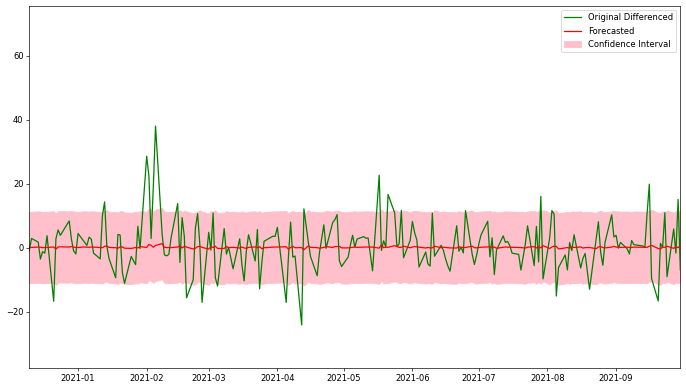

In [ ]:
lower = interval_of_confidence_ARMA['lower Close']
upper = interval_of_confidence_ARMA['upper Close']
figure(figsize=(14,8),dpi=60)
plt.plot(dsbi, color='green', label='Original Differenced')
plt.plot(mean_of_forecast_ARMA.index, mean_of_forecast_ARMA.values, color='Red', label='Forecasted')
plt.fill_between(mean_of_forecast_ARMA.index, lower, upper, color='pink', label='Confidence Interval')
plt.xlim(date2num([mean_of_forecast_ARMA.index.min(),mean_of_forecast_ARMA.index.max() ]))
plt.legend(loc='best')

##CROSS VALIDATE 